## Download data

In [4]:
# !gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/home/server1-ailab/miniconda3/envs/tuong_tf/lib/python3.8/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /home/server1-ailab/Desktop/Tuong/Tensorflow_Tutorial/Machine_Learning/MLP/Auto_MPG_data.csv
100%|██████████████████████████████████████| 15.4k/15.4k [00:00<00:00, 2.29MB/s]


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

/home/server1-ailab/miniconda3/envs/tuong_tf/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Prepare data

In [39]:
dataset = pd.read_csv("datasets/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [40]:
##### Split data #####
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

### Dataloader #####
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

##### Normalize #####
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

## Training

### Linear Model

In [27]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[9])
])

opt = tf.optimizers.SGD(learning_rate=0.1)
linear_model.compile(optimizer=opt, loss='mse',
              metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

linear_history = linear_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100


2023-05-04 17:51:57.805362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [314]
	 [[{{node Placeholder/_11}}]]
2023-05-04 17:51:57.805649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [314]
	 [[{{node Placeholder/_11}}]]


10/10 [==============================] - 1s 23ms/step - loss: 174.5136 - r_square: -1.9309 - mean_absolute_error: 10.7017 - val_loss: 19.3300 - val_r_square: 0.7040 - val_mean_absolute_error: 3.2854
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 29.8005 - r_square: 0.5134 - mean_absolute_error: 4.4460

2023-05-04 17:51:58.236344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [78]
	 [[{{node Placeholder/_11}}]]
2023-05-04 17:51:58.236572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [78]
	 [[{{node Placeholder/_11}}]]


10/10 [==============================] - 0s 10ms/step - loss: 15.4284 - r_square: 0.7409 - mean_absolute_error: 2.8634 - val_loss: 12.4720 - val_r_square: 0.8090 - val_mean_absolute_error: 2.5657
Epoch 3/100
10/10 [==============================] - 0s 10ms/step - loss: 13.0091 - r_square: 0.7815 - mean_absolute_error: 2.7084 - val_loss: 12.0396 - val_r_square: 0.8156 - val_mean_absolute_error: 2.4505
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 12.5112 - r_square: 0.7899 - mean_absolute_error: 2.6895 - val_loss: 12.4763 - val_r_square: 0.8090 - val_mean_absolute_error: 2.4581
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 12.3232 - r_square: 0.7930 - mean_absolute_error: 2.6061 - val_loss: 14.0089 - val_r_square: 0.7855 - val_mean_absolute_error: 2.9304
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 12.7610 - r_square: 0.7857 - mean_absolute_error: 2.6629 - val_loss: 13.1420 - val_r_square: 0.7988 - val_

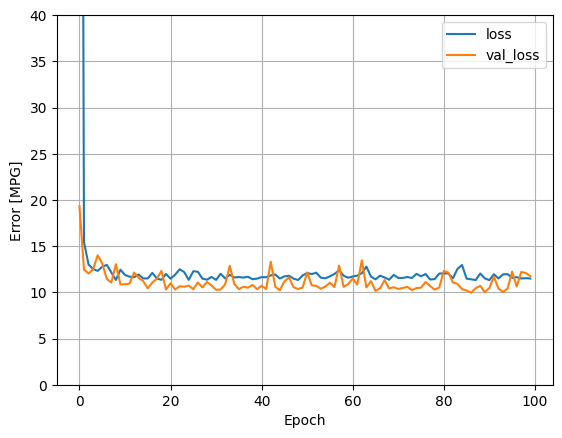

In [28]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [29]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,11.576822,0.805568,2.605779,12.239433,0.812585,2.566485,95
96,11.642561,0.804464,2.583073,10.632658,0.837189,2.414275,96
97,11.495368,0.806937,2.581062,12.202719,0.813148,2.850262,97
98,11.531190,0.806335,2.592505,12.094846,0.814799,2.573164,98
99,11.495095,0.806941,2.591497,11.751658,0.820054,2.797926,99


In [30]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  11.316588401794434
Min val loss:  9.966626167297363
Min MAE:  2.54008150100708
Min val MAE:  2.3539116382598877
Max r-squared loss:  0.809938907623291
Max val r-squared loss:  0.8473874926567078


### MLP Regression

In [44]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=[9], activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

mlp_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                640       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [45]:
opt = tf.optimizers.SGD(learning_rate=0.003)
mlp_model.compile(optimizer=opt, loss='mse',
              metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100


2023-05-04 17:59:14.834130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [314]
	 [[{{node Placeholder/_11}}]]
2023-05-04 17:59:14.834370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [314]
	 [[{{node Placeholder/_11}}]]


10/10 [==============================] - 1s 25ms/step - loss: 294.3263 - r_square: -3.9432 - mean_absolute_error: 14.3295 - val_loss: 20.0673 - val_r_square: 0.6927 - val_mean_absolute_error: 3.6104
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 36.1457 - r_square: 0.4099 - mean_absolute_error: 4.3759

2023-05-04 17:59:15.667532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [78,9]
	 [[{{node Placeholder/_10}}]]
2023-05-04 17:59:15.667763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [78]
	 [[{{node Placeholder/_11}}]]


10/10 [==============================] - 0s 12ms/step - loss: 18.3980 - r_square: 0.6910 - mean_absolute_error: 3.3070 - val_loss: 10.2333 - val_r_square: 0.8433 - val_mean_absolute_error: 2.3678
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 12.4814 - r_square: 0.7904 - mean_absolute_error: 2.7311 - val_loss: 8.5704 - val_r_square: 0.8688 - val_mean_absolute_error: 2.2719
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 10.1750 - r_square: 0.8291 - mean_absolute_error: 2.3781 - val_loss: 8.3915 - val_r_square: 0.8715 - val_mean_absolute_error: 2.0215
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 10.1780 - r_square: 0.8291 - mean_absolute_error: 2.2878 - val_loss: 11.1821 - val_r_square: 0.8288 - val_mean_absolute_error: 2.5972
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 9.3154 - r_square: 0.8435 - mean_absolute_error: 2.2091 - val_loss: 7.1434 - val_r_square: 0.8906 - val_mean

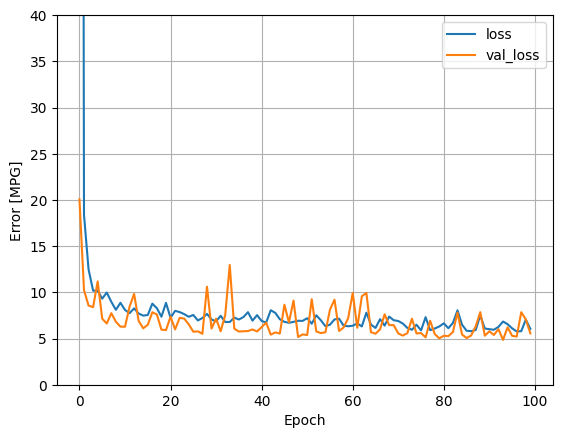

In [46]:
plt.plot(mlp_history.history['loss'], label='loss')
plt.plot(mlp_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [49]:
hist = pd.DataFrame(mlp_history.history)
hist['epoch'] = mlp_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,6.101830,0.897520,1.716724,5.289603,0.919004,1.804970,95
96,5.767377,0.903137,1.731591,5.213645,0.920167,1.752163,96
97,5.796248,0.902653,1.656894,7.850589,0.879789,2.234579,97
98,7.048797,0.881616,1.879907,7.080397,0.891582,1.932477,98
99,6.049256,0.898403,1.723866,5.554083,0.914954,1.862252,99


In [50]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  5.7673773765563965
Min val loss:  4.850958824157715
Min MAE:  1.6568936109542847
Min val MAE:  1.709653377532959
Max r-squared loss:  0.9031372666358948
Max val r-squared loss:  0.9257203936576843
